# **Flower Classification For Botanical Retail**

# **Pre-Processing Phase**
1. Data Loading and Organizing
2. Explorative Data Analysis (EDA)
3. Data Engineering


## **Data Loading**

In [1]:
import os
import zipfile
import json
from google.colab import drive

def data_loading(zip_path, json_path, output_path, base_dir):
    # Mount Google Drive
    if not os.path.exists('/content/drive/MyDrive'):
      drive.mount('/content/drive')

    # Extract the zip archive
    if not os.path.exists(json_path):
      with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_path)
    else:
      print('files already extracted')

    # Load category-to-name mappings from JSON
    with open(json_path, 'r') as f:
        category_to_name = json.load(f)

    # Define dataset directories as a dictionary
    directories = {
        'train': os.path.join(base_dir, 'train'),
        'valid': os.path.join(base_dir, 'valid'),
        'test': os.path.join(base_dir, 'test')
    }

    return category_to_name, directories

# Define file paths
zip_path = '/content/drive/MyDrive/Meine Dateien/Eigener Path/archive.zip'
output_path = '/content/drive/MyDrive/Meine Dateien/Eigener Pathr/flowers_data'
json_path = os.path.join(output_path, '102 flower', 'cat_to_name.json')
base_dir = os.path.join(output_path, '102 flower', 'flowers')

# Load data
category_to_name, directories = data_loading(zip_path, json_path, output_path, base_dir)

Mounted at /content/drive


In [2]:
category_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

In [3]:
directories

{'train': '/content/drive/MyDrive/Meine Dateien/Flower Power/flowers_data/102 flower/flowers/train',
 'valid': '/content/drive/MyDrive/Meine Dateien/Flower Power/flowers_data/102 flower/flowers/valid',
 'test': '/content/drive/MyDrive/Meine Dateien/Flower Power/flowers_data/102 flower/flowers/test'}

## **Explorative Data Analysis**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image
import numpy as np
import cv2

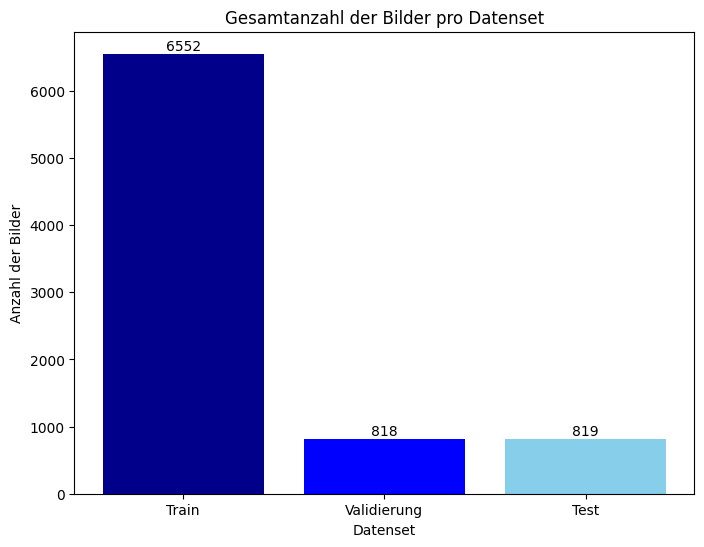

In [5]:
# Count Images per Dataset
def count_total_images(directory):
    total = 0 # count variable
    for cls in os.listdir(directory):
        folder_path = os.path.join(directory, cls)
        if os.path.isdir(folder_path):
            total += len(os.listdir(folder_path))
    return total

total_train = count_total_images(directories['train'])
total_valid = count_total_images(directories['valid'])
total_test = count_total_images(directories['test'])

datasets = ['Train', 'Validierung', 'Test']
counts = [total_train, total_valid, total_test]

plt.figure(figsize=(8, 6))
bars = plt.bar(datasets, counts, color=['darkblue', 'blue', 'skyblue'])
plt.xlabel("Datenset")
plt.ylabel("Anzahl der Bilder")
plt.title("Gesamtanzahl der Bilder pro Datenset")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}',
             ha='center', va='bottom')

plt.show()


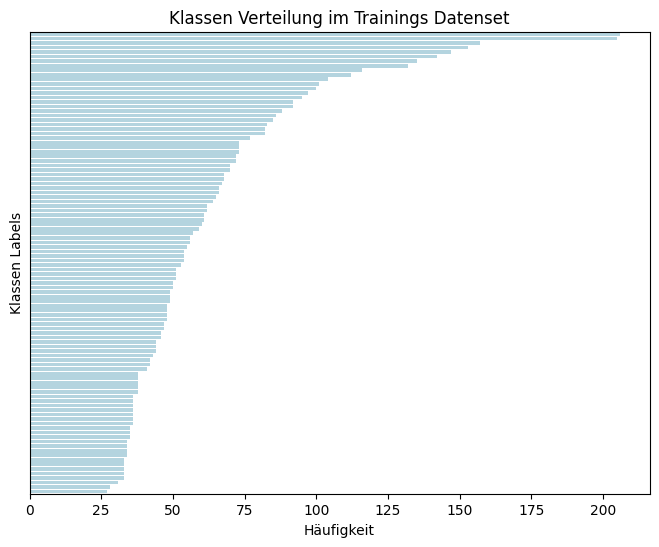

In [6]:
# Count class labels
def count_class(directory):
    class_counts = {cls: len(os.listdir(os.path.join(directory, cls))) for cls in os.listdir(directory)}
    sorted_class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(8, 6))
    # Übergib die Werte als x (Häufigkeit) und die Klassen als y (Labels)
    sns.barplot(x=list(sorted_class_counts.values()), y=list(sorted_class_counts.keys()), color="lightblue")

    plt.yticks([])
    plt.xlabel('Häufigkeit')
    plt.ylabel('Klassen Labels')
    plt.title('Klassen Verteilung im Trainings Datenset')
    plt.show()

count_class(directories['train'])

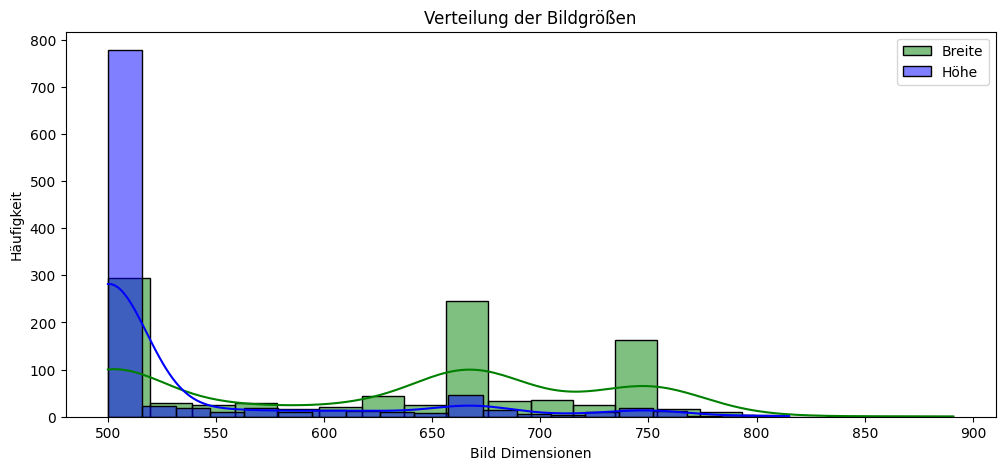

In [7]:
# Image size
def image_resizing(directory):
  image_sizes = []
  for cls in os.listdir(directory):
      cls_path = os.path.join(directory, cls)
      for img_name in os.listdir(cls_path)[:10]:  # Check only 10 images per class
          img_path = os.path.join(cls_path, img_name)
          with Image.open(img_path) as img:
            image_sizes.append(img.size)

  # Convert to NumPy array
  image_sizes = np.array(image_sizes)
  widths, heights = image_sizes[:, 0], image_sizes[:, 1]

  # Plot distribution
  plt.figure(figsize=(12, 5))
  sns.histplot(widths, bins=20, color="green", label="Breite", kde=True)
  sns.histplot(heights, bins=20, color="blue", label="Höhe", kde=True)
  plt.xlabel('Bild Dimensionen')
  plt.ylabel('Häufigkeit')
  plt.title('Verteilung der Bildgrößen')
  plt.legend()
  plt.show()

image_resizing(directories['train'])

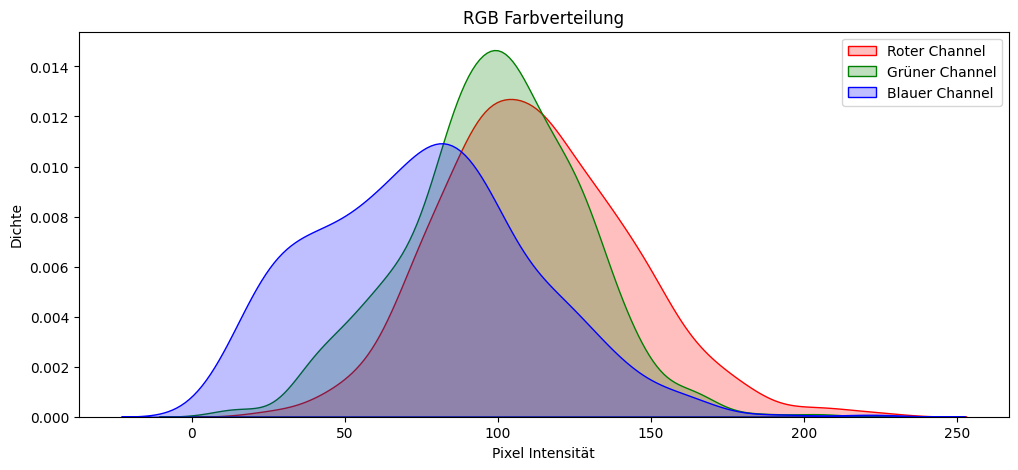

In [8]:
# Color distribution
def get_avg_rgb(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return np.mean(img[:, :, 0]), np.mean(img[:, :, 1]), np.mean(img[:, :, 2])  # R, G, B

rgb_means = []
for cls in os.listdir(directories['train']):
    cls_path = os.path.join(directories['train'], cls)
    for img_name in os.listdir(cls_path)[:5]:  # Check only 5 images per class
        img_path = os.path.join(cls_path, img_name)
        rgb_means.append(get_avg_rgb(img_path))

rgb_means = np.array(rgb_means)

# Plot RGB distributions
plt.figure(figsize=(12, 5))
sns.kdeplot(rgb_means[:, 0], color="red", label="Roter Channel", fill=True)
sns.kdeplot(rgb_means[:, 1], color="green", label="Grüner Channel", fill=True)
sns.kdeplot(rgb_means[:, 2], color="blue", label="Blauer Channel", fill=True)
plt.xlabel('Pixel Intensität')
plt.ylabel('Dichte')
plt.title('RGB Farbverteilung')
plt.legend()
plt.show()


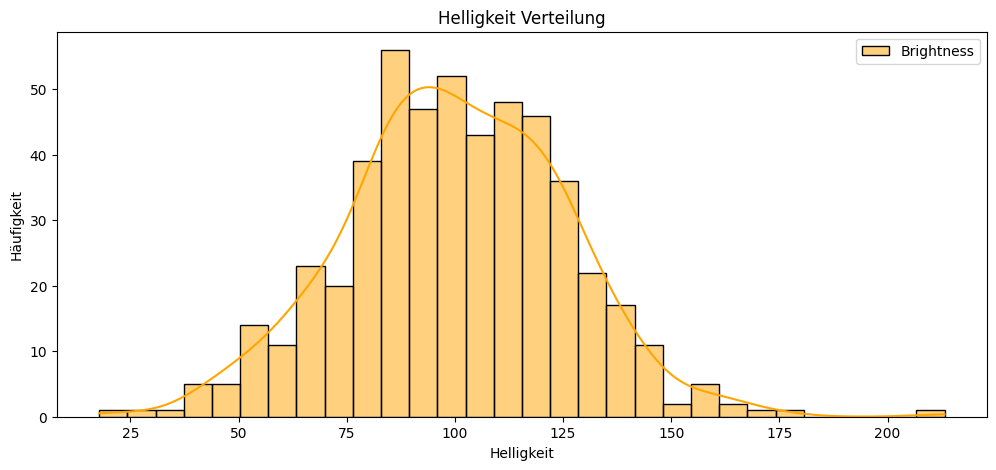

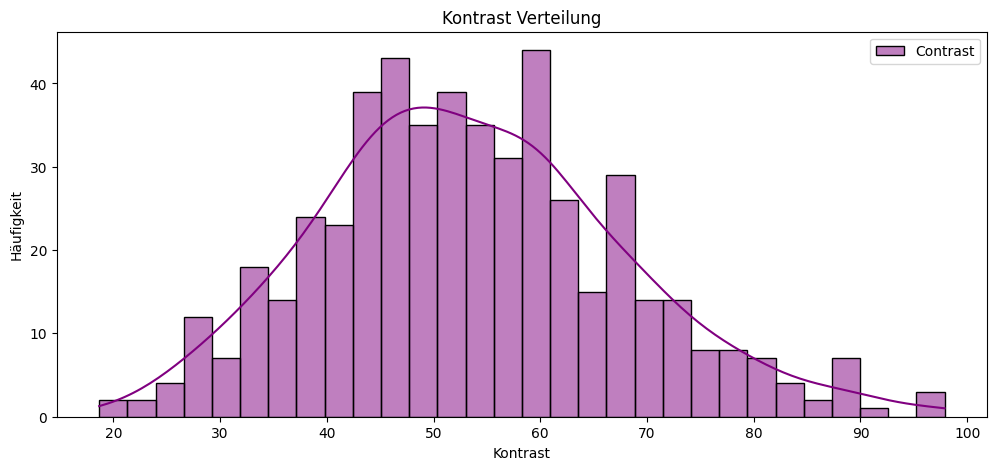

In [9]:
# Brightness and contrast
def get_brightness_contrast(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    brightness = np.mean(img)  # Average brightness
    contrast = np.std(img)  # Contrast = Standard deviation of pixel values
    return brightness, contrast

brightness_values = []
contrast_values = []

for cls in os.listdir(directories['train']):
    cls_path = os.path.join(directories['train'], cls)
    for img_name in os.listdir(cls_path)[:5]:  # Check only 5 images per class
        img_path = os.path.join(cls_path, img_name)
        brightness, contrast = get_brightness_contrast(img_path)
        brightness_values.append(brightness)
        contrast_values.append(contrast)

# Plot Brightness Distribution
plt.figure(figsize=(12, 5))
sns.histplot(brightness_values, bins=30, color="orange", label="Brightness", kde=True)
plt.xlabel('Helligkeit')
plt.ylabel('Häufigkeit')
plt.title('Helligkeit Verteilung')
plt.legend()
plt.show()

# Plot Contrast Distribution
plt.figure(figsize=(12, 5))
sns.histplot(contrast_values, bins=30, color="purple", label="Contrast", kde=True)
plt.xlabel('Kontrast')
plt.ylabel('Häufigkeit')
plt.title('Kontrast Verteilung')
plt.legend()
plt.show()


**Summary & Insights Based on EDA Results**

Dataset Distribution & Class Imbalance
- The "Counts of Images per Label" visualization indicates a significant class imbalance, with some classes having far more images than others.
- This imbalance can negatively impact model performance by causing the network to prioritize overrepresented classes while neglecting underrepresented ones.

Image Size Distribution
- The "Distribution of Image Size" plot suggests a high variance in image dimensions.
- Inconsistent image sizes may require preprocessing steps such as resizing or padding to ensure uniformity for CNN training.

Color Distribution (RGB)
- The "Distribution of Colors (RGB)" graph shows that the red channel dominates, while the green and blue channels exhibit lower intensities.
- This indicates that the dataset might have a color bias, which could affect model learning.
- Consider normalizing or converting images to grayscale if color information is not crucial.

Brightness & Contrast Analysis
- The "Distribution of Brightness" and "Distribution of Contrast" plots follow a normal distribution.
- This suggests that brightness and contrast variations are well-spread and should not cause major issues.
- However, if model performance is affected by extreme values, brightness normalization techniques can be applied.

Actionable Recommendations
- Address Class Imbalance: Use data augmentation, class weighting, or oversampling techniques to improve generalization.
- Ensure Consistent Image Sizes: Resize all images to a fixed resolution to standardize input data.
- Handle Color Variations: Consider normalization or color augmentation to mitigate color biases.
- Monitor Brightness & Contrast Impact: If needed, apply histogram equalization or normalization for better consistency.

## **Data Engineering**

In [10]:
# Data augmentation
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

def balance_classes_with_augmentation(train_dir, target_size=(224, 224)):
    class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
    max_class_count = max(class_counts.values())  # Find the class with the most images

    print(f"🚀 Balancing dataset: Target = {max_class_count} images per class")

    # Define augmentation transformations
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2]
    )

    for cls, count in class_counts.items():
        cls_path = os.path.join(train_dir, cls)

        if count < max_class_count:
            print(f"🔄 Augmenting class {cls} ({count} → {max_class_count})")
            images = os.listdir(cls_path)
            num_augment_needed = max_class_count - count

            for i in range(num_augment_needed):
                img_path = os.path.join(cls_path, images[i % len(images)])  # Cyclically select images
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)

                # Generate augmented image
                augmented_img = next(iter(datagen.flow(img_array, batch_size=1)))[0]

                # Save the new image
                new_img_path = os.path.join(cls_path, f"aug_{i}.jpg")
                save_img(new_img_path, augmented_img)

    print("✅ Dataset successfully balanced with augmentation!")

# Run the function to balance training data
balance_classes_with_augmentation(directories['train'])


🚀 Balancing dataset: Target = 206 images per class
🔄 Augmenting class 1 (27 → 206)
🔄 Augmenting class 10 (38 → 206)
🔄 Augmenting class 100 (35 → 206)
🔄 Augmenting class 101 (49 → 206)
🔄 Augmenting class 102 (36 → 206)
🔄 Augmenting class 11 (68 → 206)
🔄 Augmenting class 12 (73 → 206)
🔄 Augmenting class 13 (38 → 206)
🔄 Augmenting class 14 (44 → 206)
🔄 Augmenting class 15 (38 → 206)
🔄 Augmenting class 16 (36 → 206)
🔄 Augmenting class 17 (60 → 206)
🔄 Augmenting class 18 (65 → 206)
🔄 Augmenting class 19 (38 → 206)
🔄 Augmenting class 2 (49 → 206)
🔄 Augmenting class 20 (46 → 206)
🔄 Augmenting class 21 (34 → 206)
🔄 Augmenting class 22 (47 → 206)
🔄 Augmenting class 23 (72 → 206)
🔄 Augmenting class 24 (35 → 206)
🔄 Augmenting class 25 (34 → 206)
🔄 Augmenting class 26 (33 → 206)
🔄 Augmenting class 27 (36 → 206)
🔄 Augmenting class 28 (55 → 206)
🔄 Augmenting class 29 (62 → 206)
🔄 Augmenting class 3 (36 → 206)
🔄 Augmenting class 30 (61 → 206)
🔄 Augmenting class 31 (48 → 206)
🔄 Augmenting class 32 (36

In [11]:
# Resizing and normalization
import cv2
import os
import numpy as np

def resize_and_normalize_images(directory, target_size=(224, 224)):
    for cls in os.listdir(directory):
        cls_path = os.path.join(directory, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                # Resize to target size (224x224)
                img = cv2.resize(img, target_size)

                # Normalize pixel values to range [0,1]
                img = img.astype(np.float32) / 255.0

                # Save the processed image
                cv2.imwrite(img_path, (img * 255).astype(np.uint8))

    print(f"✅ All images in {directory} resized & normalized!")

# Apply resizing & normalization to training, validation, and test sets
resize_and_normalize_images(directories['train'])
resize_and_normalize_images(directories['valid'])
resize_and_normalize_images(directories['test'])

print("🎯 Resizing & Normalization successfully completed!")

✅ All images in /content/drive/MyDrive/Meine Dateien/Flower Power/flowers_data/102 flower/flowers/train resized & normalized!
✅ All images in /content/drive/MyDrive/Meine Dateien/Flower Power/flowers_data/102 flower/flowers/valid resized & normalized!
✅ All images in /content/drive/MyDrive/Meine Dateien/Flower Power/flowers_data/102 flower/flowers/test resized & normalized!
🎯 Resizing & Normalization successfully completed!


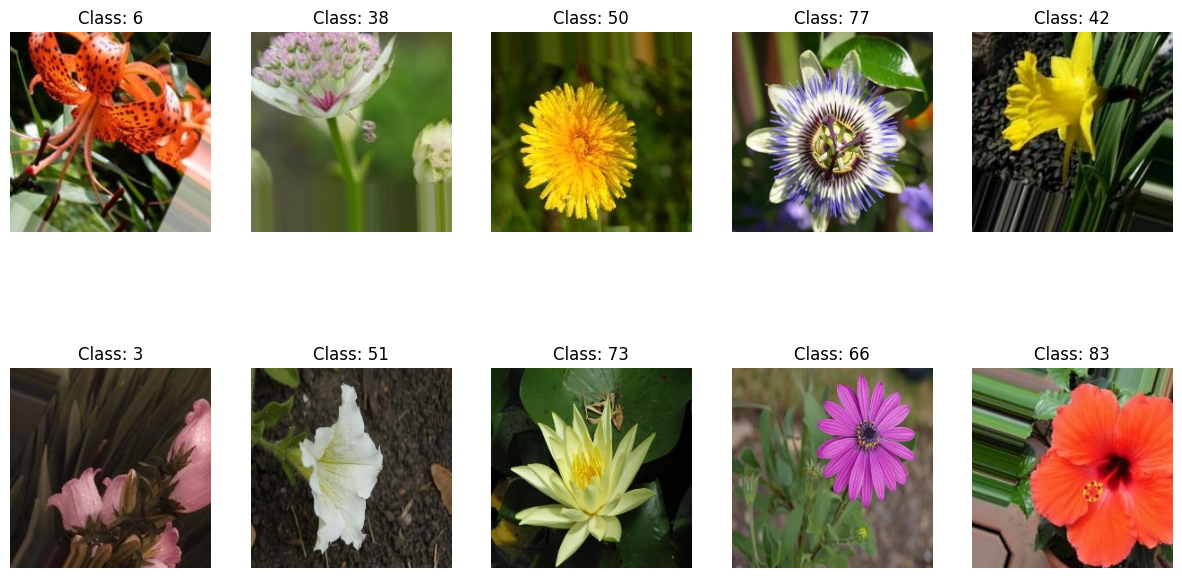

In [12]:
import matplotlib.pyplot as plt
import random
import cv2
import os
from PIL import Image

def show_sample_images(directory, num_images=10):
    plt.figure(figsize=(15, 8))
    classes = os.listdir(directory)

    for i in range(num_images):
        random_class = random.choice(classes)  # Select a random class
        class_path = os.path.join(directory, random_class)
        img_name = random.choice(os.listdir(class_path))  # Select a random image
        img_path = os.path.join(class_path, img_name)

        # Load image with OpenCV
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (from OpenCV BGR)

        # Display image
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(f"Class: {random_class}")
        plt.axis("off")

    plt.show()

show_sample_images(directories['train'])

#**Model Building Phase**

In [13]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

## **Data Transformation**

In [14]:
# Data Transformation
import tensorflow as tf

def data_transformation(BATCH_SIZE, IMG_SIZE, directories):
    # Training Dataset
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directories['train'],
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        label_mode='categorical',  # 102 Klassen = One-Hot-Encoding
        shuffle=True
    )

    # Validaten Dataset
    val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directories['valid'],
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        label_mode='categorical',
        shuffle=False
    )

    # Optimization through prefetching
    AUTOTUNE = tf.data.AUTOTUNE
    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
    val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

    return train_dataset, val_dataset

BATCH_SIZE = 128
IMG_SIZE = (224, 224)

train_dataset, val_dataset = data_transformation(BATCH_SIZE, IMG_SIZE, directories)

Found 21012 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


## **CNN Model (Own)**

### **Architecture**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# L2 Regularisierung
l2_lambda = 0.0001

def model_architecture(input_shape=(224, 224, 3), num_classes=102):
    model = models.Sequential()

    # **First Convolutional Block**
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                            kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Dropout leicht reduziert

    # **Second Convolutional Block**
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # **Third Convolutional Block**
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # **Fourth Convolutional Block**
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # **Fully Connected Layers**
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


model = model_architecture()
initial_learning_rate = 0.0005
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 30,410,662 (116.01 MB)

 Trainable params: 30,406,310 (115.99 MB)

 Non-trainable params: 4,352 (17.00 KB)

### **Model Training**

In [ ]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

In [ ]:
# Model training
import tensorflow as tf

def model_training(model):
  EPOCHS = 20

  history = model.fit(
      train_dataset,
      validation_data=val_dataset,
      epochs=EPOCHS,
      callbacks=[lr_scheduler],  # Adaptive Learning Rate
      verbose=1
  )

  print("🎯 Training completed successfully!")

  return history

history = model_training(model)

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 97s 376ms/step - accuracy: 0.1162 - loss: 4.3208 - val_accuracy: 0.2861 - val_loss: 3.5261 - learning_rate: 5.0000e-04
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 215ms/step - accuracy: 0.3713 - loss: 2.7663 - val_accuracy: 0.4230 - val_loss: 2.6690 - learning_rate: 5.0000e-04
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 209ms/step - accuracy: 0.5179 - loss: 2.1562 - val_accuracy: 0.5342 - val_loss: 2.2309 - learning_rate: 5.0000e-04
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 210ms/step - accuracy: 0.6342 - loss: 1.7016 - val_accuracy: 0.5807 - val_loss: 1.9964 - learning_rate: 5.0000e-04
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 212ms/step - accuracy: 0.7475 - loss: 1.3236 - val_accuracy: 0.5770 - val_loss: 2.0663 - learning_rate: 5.0000e-04
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 0.8337 - loss: 1.0440 - val_accuracy: 0.6357 - val_loss: 1.8370 - learning_rate: 5.0000e-04
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 21

### **Model Evaluation**

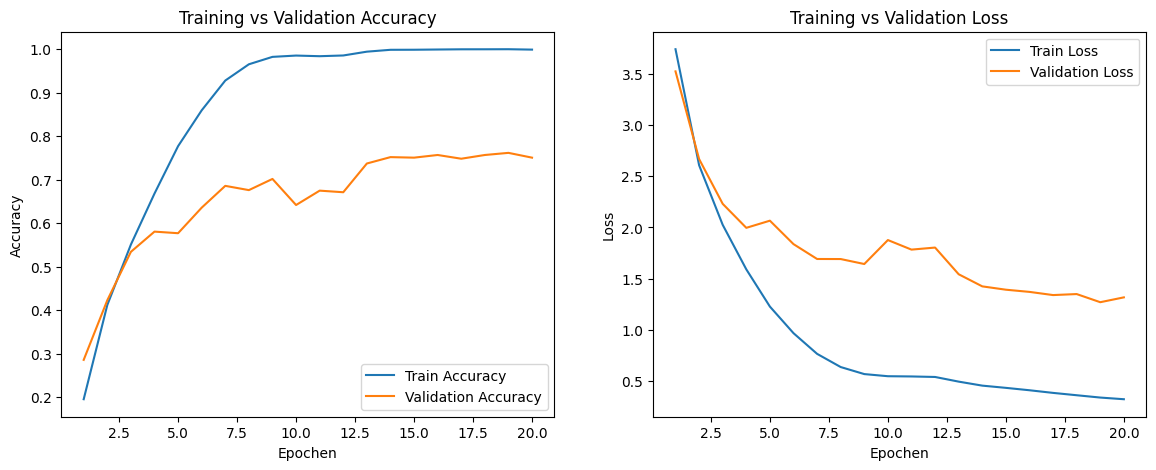

In [ ]:
# Model evaluation on training and validation set
def model_evaluation(history):
  # Extract training history
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs_range = range(1, len(acc) + 1)

  # Create figure
  plt.figure(figsize=(14, 5))

  # Plot Accuracy
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Train Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.xlabel('Epochen')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training vs Validation Accuracy')

  # Plot Loss
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Train Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.xlabel('Epochen')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.title('Training vs Validation Loss')

  plt.show()


model_evaluation(history)

Found 819 files belonging to 102 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step

📊 **Classification Report (Reduziert):**
               Wert
Accuracy   0.717949
Precision  0.751379
Recall     0.717949
F1-Score   0.713780


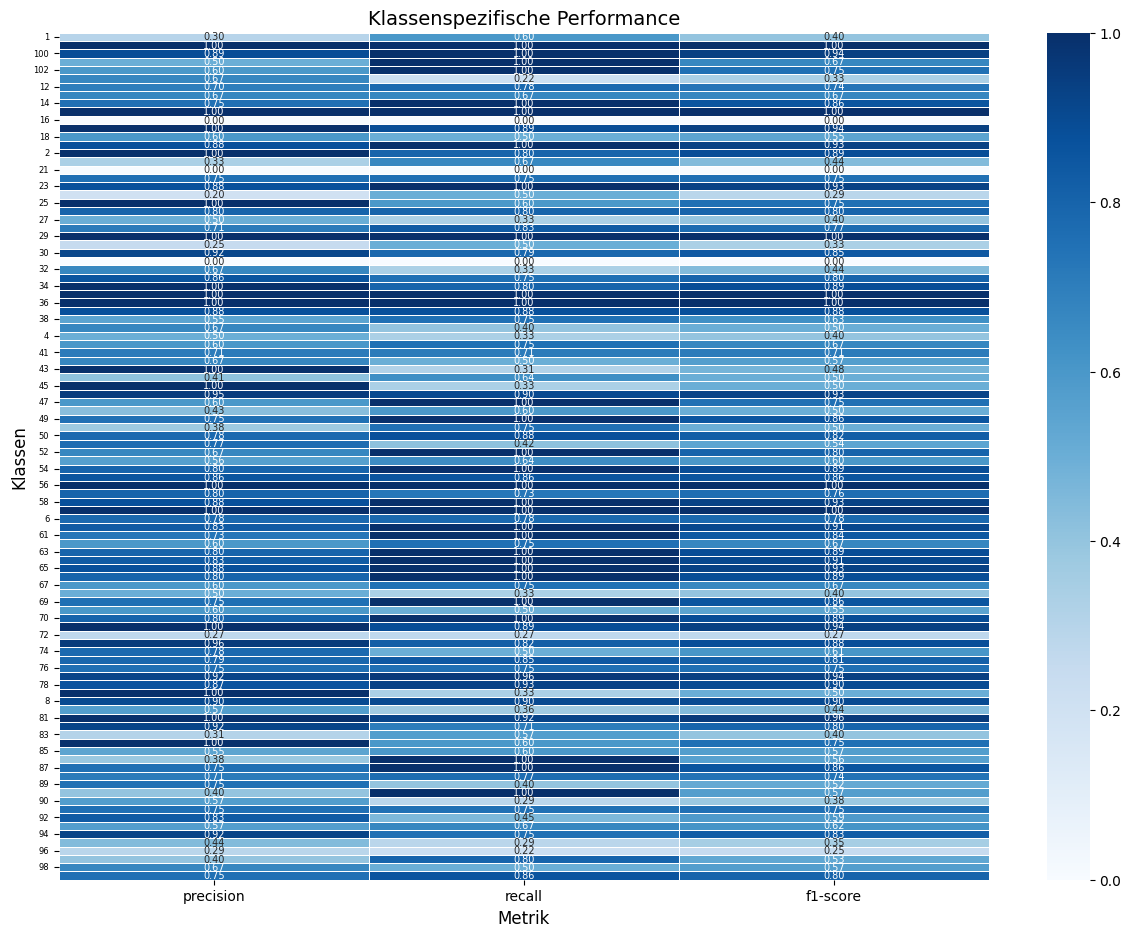

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

def model_evaluation(model, directories):
    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directories['test'],
        image_size=(224, 224),
        batch_size=128,
        label_mode='categorical',
        shuffle=False
    )

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_true = np.argmax(y_true, axis=1)
    y_pred_prob = model.predict(test_dataset)
    y_pred = np.argmax(y_pred_prob, axis=1)
    report_dict = classification_report(y_true, y_pred, target_names=test_dataset.class_names, output_dict=True)
    metrics = {
        "Accuracy": report_dict["accuracy"],
        "Precision": report_dict["weighted avg"]["precision"],
        "Recall": report_dict["weighted avg"]["recall"],
        "F1-Score": report_dict["weighted avg"]["f1-score"]
    }

    report_df = pd.DataFrame(metrics, index=["Wert"]).T
    print("\n📊 **Classification Report (Reduziert):**")
    print(report_df)

    class_metrics = pd.DataFrame(report_dict).T.iloc[:-3, :-1]
    plt.figure(figsize=(15, 11))
    sns.heatmap(class_metrics, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 7})
    plt.xlabel("Metrik", fontsize=12)
    plt.ylabel("Klassen", fontsize=12)
    plt.title("Klassenspezifische Performance", fontsize=14)
    plt.xticks(rotation=0, fontsize=10)  #
    plt.yticks(rotation=0, fontsize=6)
    plt.show()

    return report_df


evaluation_report = model_evaluation(model, directories)

### **Random Search - Hyperparameter Tuning**

In [42]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.8 MB/s eta 0:00:00


In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import keras_tuner as kt

def build_model(hp):
    model = models.Sequential()

    # First Convolutional Block
    model.add(layers.Conv2D(
        filters=hp.Choice('conv1_filters', [32, 64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=l2(hp.Choice('l2_lambda', [0.00001, 0.0001, 0.001])),
        input_shape=(224, 224, 3)
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(
        filters=hp.Choice('conv2_filters', [32, 64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=l2(hp.Choice('l2_lambda', [0.00001, 0.0001, 0.001]))
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(hp.Choice('dropout1', [0.3, 0.4, 0.5])))

    # Second Convolutional Block
    model.add(layers.Conv2D(
        filters=hp.Choice('conv3_filters', [64, 128, 256]),
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=l2(hp.Choice('l2_lambda', [0.00001, 0.0001, 0.001]))
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(hp.Choice('dropout2', [0.3, 0.4, 0.5])))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Choice('dense_neurons', [128, 256, 512]),
        activation='relu',
        kernel_regularizer=l2(hp.Choice('l2_lambda', [0.00001, 0.0001, 0.001]))
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp.Choice('dropout3', [0.3, 0.4, 0.5])))

    model.add(layers.Dense(102, activation='softmax'))  # 102 Klassen

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0001, 0.0005, 0.001])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [44]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='keras_tuner_results',
    project_name='flower_classification_tuning'
)


In [45]:
tuner.search(train_dataset, validation_data=val_dataset, epochs=10)


Trial 10 Complete [00h 06m 01s]
val_accuracy: 0.47555011510849

Best val_accuracy So Far: 0.5110024213790894
Total elapsed time: 01h 00m 26s


In [46]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print("\n🎯 Beste Hyperparameter gefunden:")
for param in best_hps.values.keys():
    print(f"{param}: {best_hps.get(param)}")





🎯 Beste Hyperparameter gefunden:
conv1_filters: 64
l2_lambda: 0.001
conv2_filters: 128
dropout1: 0.3
conv3_filters: 64
dropout2: 0.5
dense_neurons: 256
dropout3: 0.5
learning_rate: 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### **New Training with new Parameters**

In [47]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# L2 Regularisierung
l2_lambda = 0.0001

def model_architecture(input_shape=(224, 224, 3), num_classes=102):
    model = models.Sequential()

    # **First Convolutional Block**
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                            kernel_regularizer=l2(l2_lambda), input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Dropout leicht reduziert

    # **Second Convolutional Block**
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # **Third Convolutional Block**
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # **Fully Connected Layers**
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=l2(l2_lambda)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


model = model_architecture()
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,245,478 (50.53 MB)

 Trainable params: 13,243,942 (50.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [49]:
# Model training
import tensorflow as tf

def model_training(model):
  EPOCHS = 20

  history = model.fit(
      train_dataset,
      validation_data=val_dataset,
      epochs=EPOCHS,
      callbacks=[lr_scheduler],  # Adaptive Learning Rate
      verbose=1
  )

  print("🎯 Training completed successfully!")

  return history

history = model_training(model)

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 56s 250ms/step - accuracy: 0.1109 - loss: 4.2848 - val_accuracy: 0.1699 - val_loss: 4.3540 - learning_rate: 0.0010
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - accuracy: 0.3279 - loss: 2.8571 - val_accuracy: 0.3851 - val_loss: 2.7088 - learning_rate: 0.0010
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - accuracy: 0.4644 - loss: 2.2680 - val_accuracy: 0.4267 - val_loss: 2.9475 - learning_rate: 0.0010
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - accuracy: 0.5664 - loss: 1.8750 - val_accuracy: 0.5306 - val_loss: 2.4460 - learning_rate: 0.0010
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.6513 - loss: 1.5870 - val_accuracy: 0.5355 - val_loss: 2.2075 - learning_rate: 0.0010
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 31s 187ms/step - accuracy: 0.7426 - loss: 1.3194 - val_accuracy: 0.5281 - val_loss: 2.3756 - learning_rate: 0.0010
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 190ms/step - accuracy: 0.8

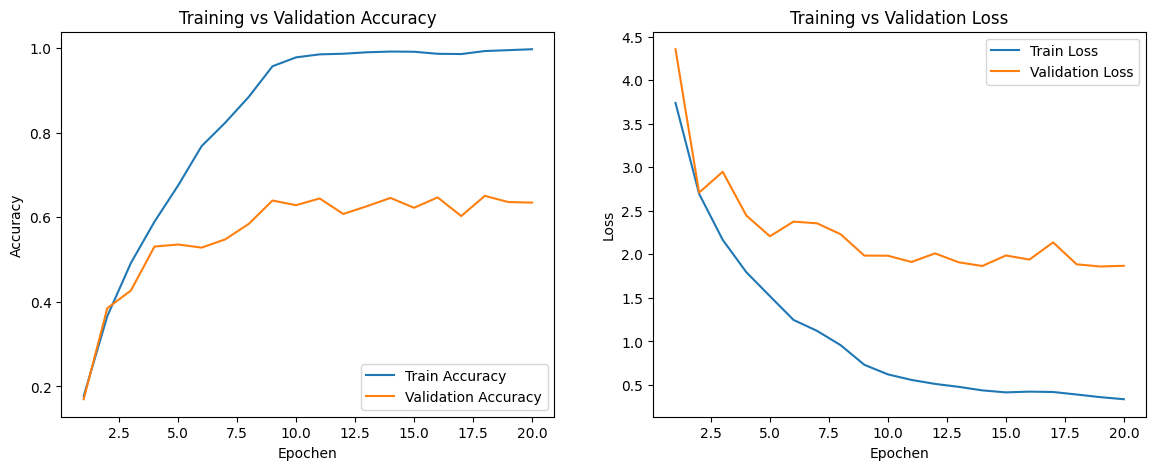

In [50]:
# Model evaluation on training and validation set
def model_evaluation(history):
  # Extract training history
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs_range = range(1, len(acc) + 1)

  # Create figure
  plt.figure(figsize=(14, 5))

  # Plot Accuracy
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Train Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.xlabel('Epochen')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training vs Validation Accuracy')

  # Plot Loss
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Train Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.xlabel('Epochen')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.title('Training vs Validation Loss')

  plt.show()


model_evaluation(history)

Found 819 files belonging to 102 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step

📊 **Classification Report (Reduziert):**
               Wert
Accuracy   0.619048
Precision  0.645004
Recall     0.619048
F1-Score   0.613619


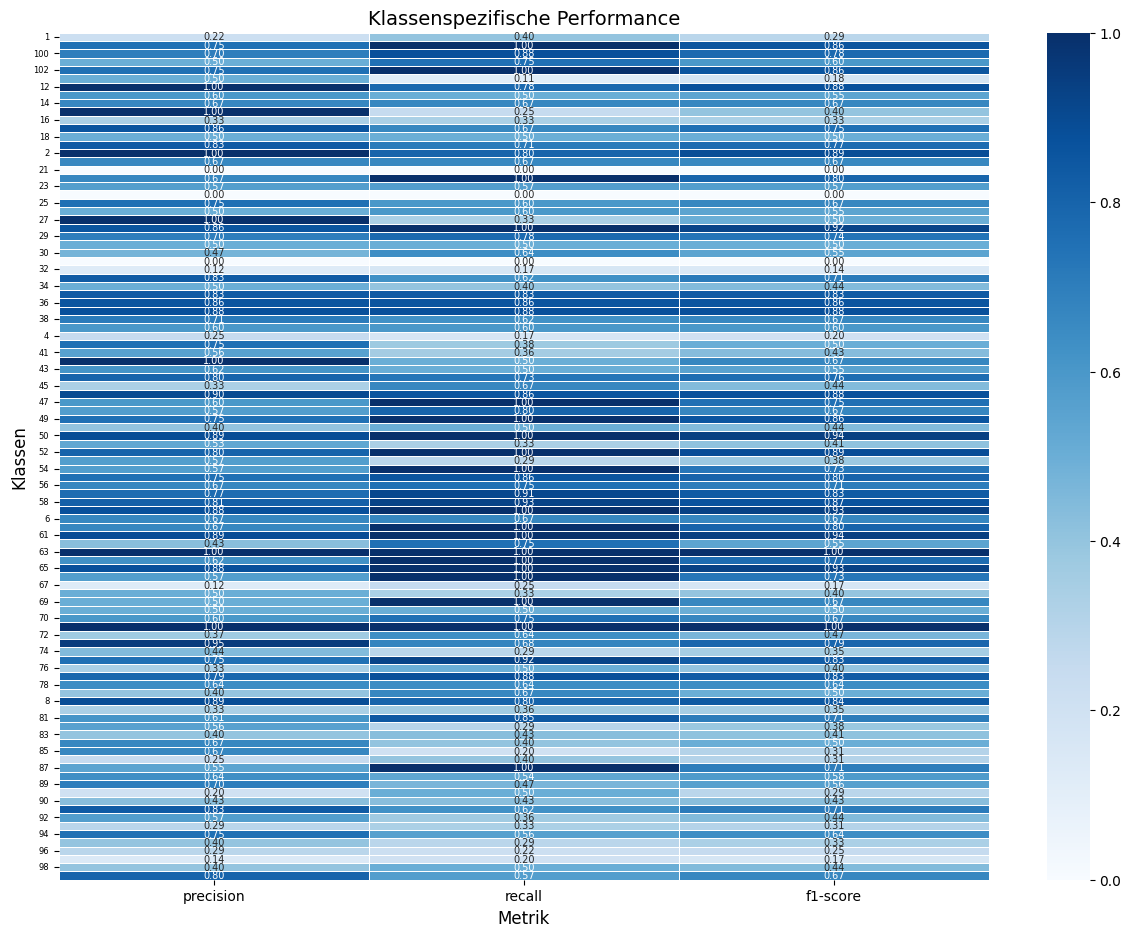

In [51]:
import pandas as pd
from sklearn.metrics import classification_report

def model_evaluation(model, directories):
    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directories['test'],
        image_size=(224, 224),
        batch_size=128,
        label_mode='categorical',
        shuffle=False
    )

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_true = np.argmax(y_true, axis=1)
    y_pred_prob = model.predict(test_dataset)
    y_pred = np.argmax(y_pred_prob, axis=1)
    report_dict = classification_report(y_true, y_pred, target_names=test_dataset.class_names, output_dict=True)
    metrics = {
        "Accuracy": report_dict["accuracy"],
        "Precision": report_dict["weighted avg"]["precision"],
        "Recall": report_dict["weighted avg"]["recall"],
        "F1-Score": report_dict["weighted avg"]["f1-score"]
    }

    report_df = pd.DataFrame(metrics, index=["Wert"]).T
    print("\n📊 **Classification Report (Reduziert):**")
    print(report_df)

    class_metrics = pd.DataFrame(report_dict).T.iloc[:-3, :-1]
    plt.figure(figsize=(15, 11))
    sns.heatmap(class_metrics, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 7})
    plt.xlabel("Metrik", fontsize=12)
    plt.ylabel("Klassen", fontsize=12)
    plt.title("Klassenspezifische Performance", fontsize=14)
    plt.xticks(rotation=0, fontsize=10)  #
    plt.yticks(rotation=0, fontsize=6)
    plt.show()

    return report_df


evaluation_report = model_evaluation(model, directories)

## **CNN Transfer Learning - EfficientNetB0**

In [52]:
# Setting random seeds
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Clear tf.keras backend
tf.keras.backend.clear_session()

### **Load and compile EfficientNETB0 Model**

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam

def model_transferlearning(img_size=(224, 224), num_classes=102):
    # Load EfficientNetB0 without top layers (include_top=False)
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
    base_model.trainable = False # Freeze the base model initially (no weight updates)

    # Create a new model on top of the pre-trained base
    model = models.Sequential([
        base_model,  # Pre-trained EfficientNet base model
        layers.GlobalAveragePooling2D(),  # Feature extraction layer
        layers.Dense(512, activation='relu'),  # Fully connected layer
        layers.BatchNormalization(),
        layers.Dropout(0.4),  # Regularization to prevent overfitting
        layers.Dense(num_classes, activation='softmax')  # Output layer for classification
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = model_transferlearning()
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 102)                 │          52,326 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,759,817 (18.16 MB)

 Trainable params: 709,222 (2.71 MB)

 Non-trainable params: 4,050,595 (15.45 MB)

### **Model Training**

In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

def model_training(model, train_dataset, val_dataset, epochs=10):
    # Adaptive Learning Rate Reduction
    lr_scheduler = ReduceLROnPlateau(
        monitor='val_loss',  # Monitor validation loss
        factor=0.5,  # Reduce learning rate by half when val_loss stops improving
        patience=3,  # Wait for 3 epochs before reducing LR
        verbose=1,
        min_lr=1e-6  # Minimum learning rate
    )

    # Train the model (only the new layers)
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[lr_scheduler],  # Reduce learning rate when val_loss plateaus
        verbose=1
    )

    print("🎯 Transfer Learning Training completed successfully!")

    return history

history = model_training(model, train_dataset, val_dataset, epochs=10)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 101s 442ms/step - accuracy: 0.4527 - loss: 2.5501 - val_accuracy: 0.9083 - val_loss: 0.8047 - learning_rate: 5.0000e-04
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9014 - loss: 0.4019 - val_accuracy: 0.9401 - val_loss: 0.2982 - learning_rate: 5.0000e-04
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9496 - loss: 0.2116 - val_accuracy: 0.9487 - val_loss: 0.2061 - learning_rate: 5.0000e-04
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.9720 - loss: 0.1289 - val_accuracy: 0.9560 - val_loss: 0.1851 - learning_rate: 5.0000e-04
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.9782 - loss: 0.0983 - val_accuracy: 0.9597 - val_loss: 0.1667 - learning_rate: 5.0000e-04
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.9866 - loss: 0.0664 - val_accuracy: 0.9609 - val_loss: 0.1607 - learning_rate: 5.0000e-04
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 1

### **Fine Tuning**

In [55]:
def model_finetuning(model, train_dataset, val_dataset, epochs=10, learning_rate=0.0001):
    # Adaptive Learning Rate Reduction
    lr_scheduler = ReduceLROnPlateau(
        monitor='val_loss',  # Monitor validation loss
        factor=0.5,  # Reduce learning rate by half when val_loss stops improving
        patience=3,  # Wait for 3 epochs before reducing LR
        verbose=1,
        min_lr=1e-6  # Minimum learning rate
    )

    # Unfreeze all layers for fine-tuning
    model.trainable = True

    # Recompile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the entire model with fine-tuning
    history_fine_tune = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[lr_scheduler],  # Continue using adaptive learning rate scheduler
        verbose=1
    )

    print("🎯 Fine-Tuning completed successfully!")

    return history_fine_tune

history_fine_tune = model_finetuning(model, train_dataset, val_dataset, epochs=10)

Epoch 1/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 76s 318ms/step - accuracy: 0.9949 - loss: 0.0255 - val_accuracy: 0.9584 - val_loss: 0.1423 - learning_rate: 1.0000e-04
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 191ms/step - accuracy: 0.9967 - loss: 0.0181 - val_accuracy: 0.9597 - val_loss: 0.1463 - learning_rate: 1.0000e-04
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.9971 - loss: 0.0175 - val_accuracy: 0.9633 - val_loss: 0.1361 - learning_rate: 1.0000e-04
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 196ms/step - accuracy: 0.9979 - loss: 0.0143 - val_accuracy: 0.9609 - val_loss: 0.1375 - learning_rate: 1.0000e-04
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.9984 - loss: 0.0134 - val_accuracy: 0.9658 - val_loss: 0.1311 - learning_rate: 1.0000e-04
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9984 - loss: 0.0112 - val_accuracy: 0.9621 - val_loss: 0.1360 - learning_rate: 1.0000e-04
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 31s 19

### **Model Evaluation**

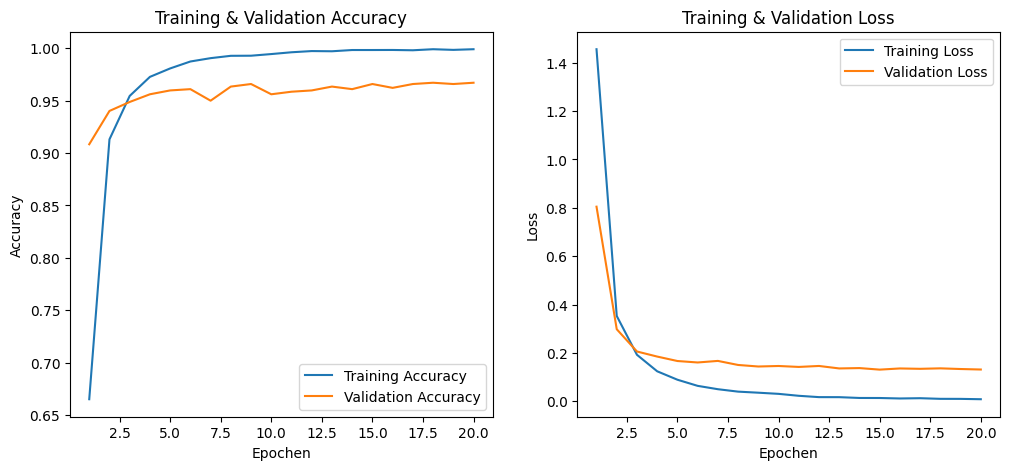

In [56]:
def plot_training_history(history, history_fine_tune=None):
    # **Extract accuracy & loss values**
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    if history_fine_tune:
        acc += history_fine_tune.history['accuracy']
        val_acc += history_fine_tune.history['val_accuracy']
        loss += history_fine_tune.history['loss']
        val_loss += history_fine_tune.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # **Create subplot for Accuracy & Loss**
    plt.figure(figsize=(12, 5))

    # **Plot Accuracy**
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochen')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    # **Plot Loss**
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochen')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')

    plt.show()

plot_training_history(history, history_fine_tune)

Found 819 files belonging to 102 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step

📊 **Classification Report (Reduziert):**
               Wert
Accuracy   0.956044
Precision  0.960510
Recall     0.956044
F1-Score   0.955643


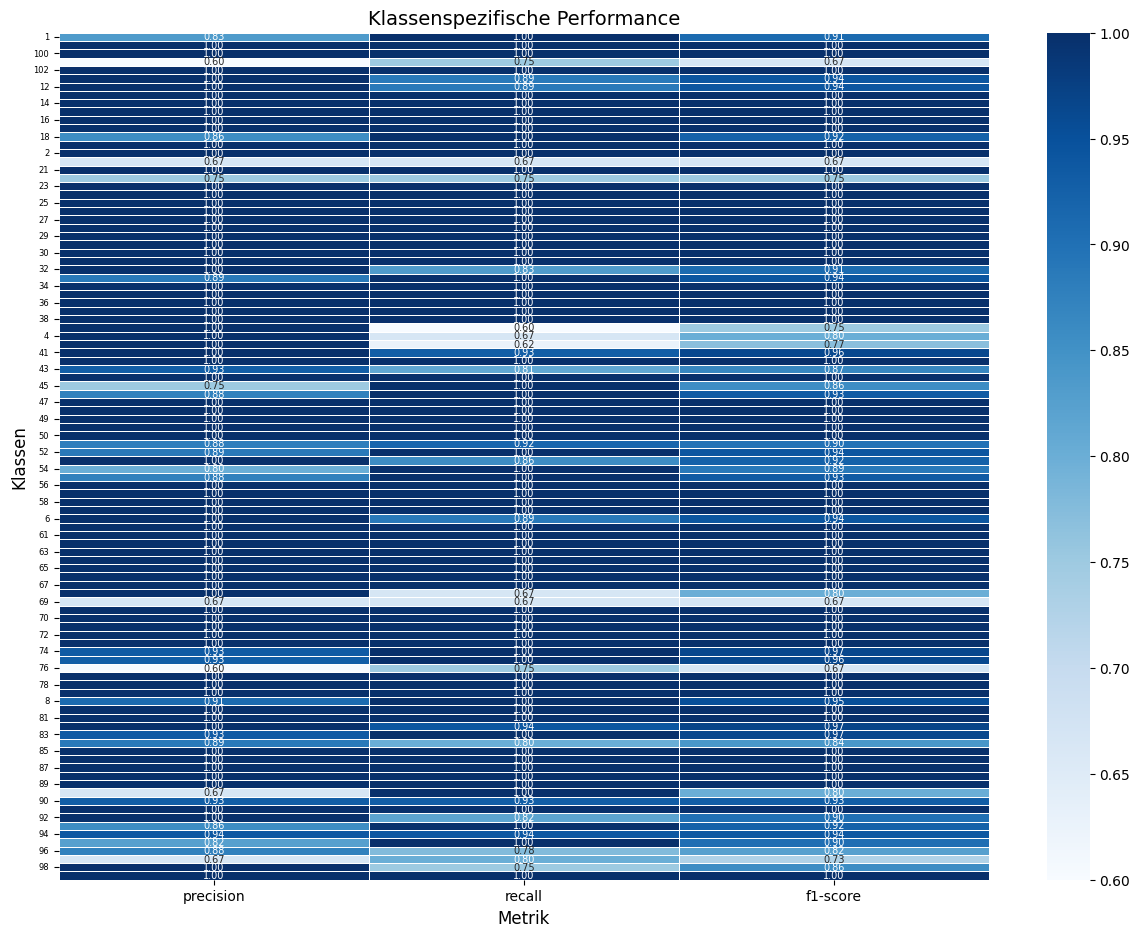

In [58]:
import pandas as pd
from sklearn.metrics import classification_report

def model_evaluation(model, directories):
    test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directories['test'],
        image_size=(224, 224),
        batch_size=128,
        label_mode='categorical',
        shuffle=False
    )

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_true = np.argmax(y_true, axis=1)
    y_pred_prob = model.predict(test_dataset)
    y_pred = np.argmax(y_pred_prob, axis=1)
    report_dict = classification_report(y_true, y_pred, target_names=test_dataset.class_names, output_dict=True)
    metrics = {
        "Accuracy": report_dict["accuracy"],
        "Precision": report_dict["weighted avg"]["precision"],
        "Recall": report_dict["weighted avg"]["recall"],
        "F1-Score": report_dict["weighted avg"]["f1-score"]
    }

    report_df = pd.DataFrame(metrics, index=["Wert"]).T
    print("\n📊 **Classification Report (Reduziert):**")
    print(report_df)

    class_metrics = pd.DataFrame(report_dict).T.iloc[:-3, :-1]
    plt.figure(figsize=(15, 11))
    sns.heatmap(class_metrics, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 7})
    plt.xlabel("Metrik", fontsize=12)
    plt.ylabel("Klassen", fontsize=12)
    plt.title("Klassenspezifische Performance", fontsize=14)
    plt.xticks(rotation=0, fontsize=10)  #
    plt.yticks(rotation=0, fontsize=6)
    plt.show()

    return report_df


evaluation_report = model_evaluation(model, directories)